<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/Data_pre_processing_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
import os
import sys
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# Directory of images to run detection on
D2S_DATSET_DIR = '/content/gdrive/My Drive/Colab Notebooks/d2s_data'

annotations= os.path.join(D2S_DATSET_DIR, 'd2s_annotations_v1/D2S_validation.json')

In [11]:
import time
from pycocotools import coco
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

from PIL import Image

def show(id):
  imgid= coco.getImgIds(id)
  #print imgid
  Imgs = coco.loadImgs(id)[0]
  #print Imgs
  imagefile = "/home/dl-linux/coco/images/"
  imageurl = imagefile + Imgs['file_name']
  #print imageurl
  I = io.imread(imageurl)

  plt.imshow(I)
  plt.show()

  return Imgs, I ,Imgs['file_name']

In [12]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)


annFile = "/content/gdrive/MyDrive/Colab Notebooks/data/d2s_annotations_v1/D2S_validation.json"


coco=coco.COCO(annFile)

#print coco.loadAnns(coco.getAnnIds())

print(len(coco.getCatIds()))
print(coco.getAnnIds()[0])

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
for i in range(len(nms)):
  print(nms[i])


loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
60
800001
adelholzener_alpenquelle_classic_075
adelholzener_alpenquelle_naturell_075
adelholzener_classic_bio_apfelschorle_02
adelholzener_classic_naturell_02
adelholzener_gourmet_mineralwasser_02
augustiner_lagerbraeu_hell_05
augustiner_weissbier_05
coca_cola_05
coca_cola_light_05
suntory_gokuri_limonade
tegernseer_hell_03
corny_nussvoll
corny_nussvoll_single
corny_schoko_banane
corny_schoko_banane_single
dr_oetker_vitalis_knuspermuesli_klassisch
koelln_muesli_fruechte
koelln_muesli_schoko
caona_kakaohaltiges_getraenkepulver
cocoba_fruehstueckskakao_mit_honig
cafe_wunderbar_espresso
douwe_egberts_professional_kaffee_gemahlen
gepa_bio_caffe_crema
gepa_italienischer_bio_espresso
apple_braeburn_bundle
apple_golden_delicious
apple_granny_smith
apple_roter_boskoop
avocado
banana_bundle
banana_single
clementine
clementine_single
grapes_green_sugraone_seedless
grapes_sweet_celebration_seedless
kiwi
orange_sing

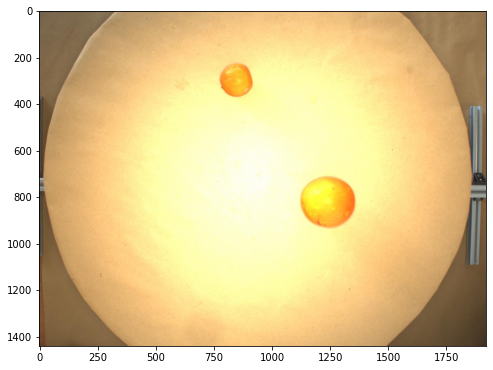

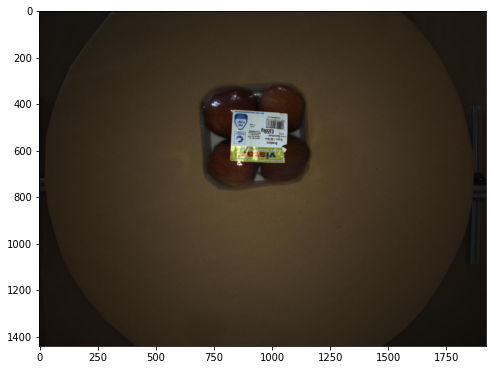

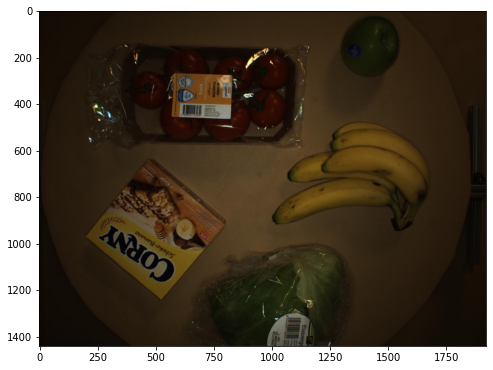

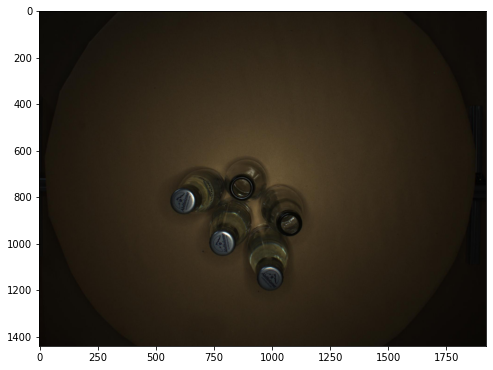

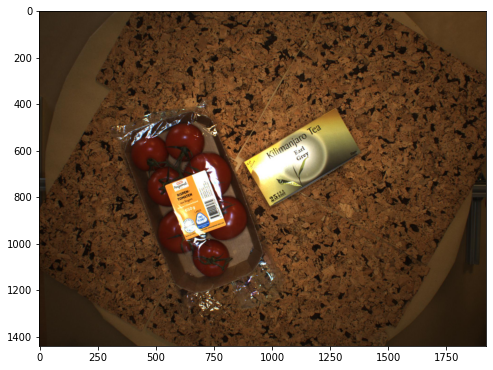

In [51]:
images = glob("/content/gdrive/My Drive/Colab Notebooks/data/images/*")

for i in range(1,9000,2000):
    image = Image.open(images[i])
    imgplot = plt.imshow(image)
    plt.show()

In [21]:
I_w = 1920.0
I_h = 1440.0
#print coco.loadAnns(coco.getAnnIds()[0])
for i in range(len(coco.getAnnIds())):
  #print coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][0]
  image_id =  coco.loadAnns(ids=coco.getAnnIds()[i])[0]['image_id']
  #print coco.loadAnns(ids=coco.getAnnIds()[i])[0]['image_id']

  x1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][0])
  y1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][1])
  w1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][2])
  h1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][3])
  #print x1,y1,w1,h1
  x = ((x1 + x1 + w1)/2)/I_w
  y = ((y1 + y1 + h1)/2)/I_h
  w = w1 / I_w
  h = h1 / I_h

  category_id = coco.loadAnns(ids=coco.getAnnIds()[i])[0]['category_id']
  #print category_id

  if int(image_id)<100000:
    txt = "/content/gdrive/MyDrive/Colab Notebooks/lables/" + "D2S_" + "%06d.txt" %image_id
  elif int(image_id)<100000000:
    txt = "/content/gdrive/MyDrive/Colab Notebooks/lables/" + "D2S_" + "%08d.txt" %image_id

  with open(txt,'a') as file:
    file.write(str(category_id-1) + ' ' + str(x) + ' ' + str(y) + ' ' + str(w) + ' ' + str(h) +  '\n' )
  file.close()

In [25]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

In [28]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 11.99 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [33]:
#!git clone https://github.com/AlexeyAB/darknet.git
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-12-04 14:29:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  48.0MB/s    in 3.5s    

2021-12-04 14:29:35 (44.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]

